In [3]:
# Standard imports
import numpy as np
import pandas as pd

import random

# To interact with the operating system
import os

# For statistical modeling
import scipy.stats as stats

# To acquire MYSQL Data
import acquire
from env import username, password, host
import wrangle

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import evaluate

# For running modeling
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtc
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [4]:
zillow = pd.read_csv('zillow_2017_w_transactiondate.csv')

In [3]:
zillow.head()

,Unnamed: 0,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc
0,0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,...,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential
1,1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,...,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential
2,2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,...,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential
3,3,261.0,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,...,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential
4,4,266.0,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,...,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,4,0.006940,2017-01-01,Condominium


In [6]:
zillow['transactiondate'] = zillow['transactiondate'].str[:7]

In [7]:
zillow['transactiondate'].str[5:7]

0        01
1        01
2        01
3        01
4        01
         ..
77575    09
77576    09
77577    09
77578    09
77579    05
Name: transactiondate, Length: 77580, dtype: object

In [8]:
#create a new column for the month of the transaction to see later if there might be a relationship by the month in 2017
zillow['month'] = zillow['transactiondate'].str[5:7]

In [9]:
zillow['transactiondate'] = zillow['transactiondate'].str[:4]

In [10]:
zillow = zillow[(zillow.propertylandusedesc == 'Single Family Residential') & (zillow.transactiondate == '2017')]

In [9]:
zillow.isnull().sum()

Unnamed: 0                   0
propertylandusetypeid        0
parcelid                     0
id                           0
airconditioningtypeid    38803
                         ...  
id.1                         0
logerror                     0
transactiondate              0
propertylandusedesc          0
month                        0
Length: 65, dtype: int64

**propertylandusetypeid**<br>               0 - Dropping (all are same)<br>
**parcelid**<br>                            0 - Not Dropping <br>
**airconditioningtypeid**<br>           38803 - Dropping <br>
**architecturalstyletypeid**<br>        52371 - Dropping <br>
**basementsqft**<br>                    52394 - Dropping <br>
**bathroomcnt**<br>                         0 - Not Dropping <br>
**bedroomcnt:**<br>                          0 - Not Dropping <br>
**buildingclasstypeid:**<br>             52441 - Dropping <br>
**buildingqualitytypeid:**<br>           18701 - Not Dropping <br>
**calculatedbathnbr:**<br>                 137 - Dropping (Almost identical to bathroomcnt)<br>
**decktypeid:**<br>                      52052 - Dropping <br>
**finishedfloor1squarefeet:**<br>        48060 - Dropping <br>
**calculatedfinishedsquarefeet:**<br>       82 - Not Dropping <br>
**finishedsquarefeet12:**<br>              247 - Dropping (too many similarites to calculatedfinishedsquarefeet)<br>
**finishedsquarefeet13:**<br>            52441 - Dropping (99%+ are nulls)<br>
**finishedsquarefeet15:**<br>            52441 - Dropping (99%+ are nulls)<br>
**finishedsquarefeet50:**<br>            48060 - Dropping (87%+ are nulls)<br>
**finishedsquarefeet6:**<br>             52276 - Dropping (99%+ are nulls)<br>
**fips:**<br>                                0 - Not Dropping <br>
**fireplacecnt:**<br>                    45198 - Dropping (87%+ are nulls)<br>
**fullbathcnt:**<br>                       137 - Dropping (not needed)<br>
**garagecarcnt:**<br>                    34426 - Dropping <br>
**garagetotalsqft:**<br>                 34426 - Dropping <br>
**hashottuborspa:**<br>                  50926 - Not Dropping <br>
**heatingorsystemtypeid:**<br>           18506 - Not Dropping <br>
**latitude:**<br>                            0 - Not Dropping <br>
**longitude:**<br>                           0 - Not Dropping <br>
**lotsizesquarefeet:**<br>                 369 - Not Dropping <br>
**poolcnt:**<br>                         41345 - Not Dropping <br>
**poolsizesum:**<br>                     51574 - Not Dropping <br>
**pooltypeid10:**<br>                    51997 - Not Dropping <br>
**pooltypeid2:**<br>                     51370 - Not Dropping <br>
**pooltypeid7:**<br>                     42432 - Not Dropping <br>
**propertycountylandusecode:**<br>           0 - Not Dropping <br>
**propertyzoningdesc:**<br>              18593 - Not Dropping <br>
**rawcensustractandblock:**<br>              0 - Not Dropping <br>
**regionidcity:**<br>                     1037 - Dropping (regionidzip has less nulls and more diversified values)<br>
**regionidcounty:**<br>                      0 - Dropping (fips gives the same information)<br>
**regionidneighborhood:**<br>            33408 - Dropping (over 50% nulls)<br>
**regionidzip:**<br>                        26 - Not Dropping <br>
**roomcnt:**<br>                             0 - Dropping (Too many incorrect values, 0 rooms for over half the dataset)<br>
**storytypeid:**<br>                     52394 - Dropping (99%+ are nulls)<br>
**threequarterbathnbr:**<br>             45717 - Dropping (87%+ are nulls)<br>
**typeconstructiontypeid:**<br>          52365 - Dropping (99%+ are nulls)<br>
**unitcnt:**<br>                         18594 - Dropping (99.9 SFH have no ADUs)<br>
**yardbuildingsqft17:**<br>              50504 - Dropping <br>
**yardbuildingsqft26:**<br>              52378 - Dropping <br>
**yearbuilt:**<br>                         116 - Not Dropping <br>
**numberofstories:**<br>                 37880 - Dropping <br>
**fireplaceflag:**<br>                   52360 - Dropping <br>
**structuretaxvaluedollarcnt:**<br>         84 - Dropping (Derived from target variable)<br>
**taxvaluedollarcnt:**<br>                   1 - Not Dropping <br>
**assessmentyear:**<br>                      0 - Dropping (All 2016)<br>
**landtaxvaluedollarcnt:**<br>               1 - Dropping (Derived from target variable)<br>
**taxamount:**<br>                           4 - Not Dropping <br>
**taxdelinquencyflag:**<br>              50362 - Dropping <br>
**taxdelinquencyyear:**<br>              50362 - Dropping <br>
**censustractandblock:**<br>               123 - Not Dropping <br>
**transactiondate:**<br>                     0 - Dropping (all properties had a transaction in 2017)<br>
**propertylandusedesc:**<br>                 0 - Dropping (All are SFH)<br>
ADDED NEW column 'month' that will take the place of transaction date

In [10]:
zillow.head(3)

,Unnamed: 0,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,month
0,0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,...,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,2017,Single Family Residential,01
1,1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,...,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,2017,Single Family Residential,01
2,2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,...,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,2017,Single Family Residential,01


In [11]:
zillow = zillow[['parcelid','bathroomcnt', 'bedroomcnt','buildingqualitytypeid', 'calculatedfinishedsquarefeet',
                 'fips','heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidzip', 
                 'yearbuilt','taxvaluedollarcnt','taxamount', 'month']]
zillow

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,month
0,14297519,3.5,4.0,NaN,3100.0,6059.0,NaN,33634931.0,-117869207.0,4506.0,96978.0,1998.0,1023282.0,11013.72,01
1,17052889,1.0,2.0,NaN,1465.0,6111.0,NaN,34449266.0,-119281531.0,12647.0,97099.0,1967.0,464000.0,5672.48,01
2,14186244,2.0,3.0,NaN,1243.0,6059.0,NaN,33886168.0,-117823170.0,8432.0,97078.0,1962.0,564778.0,6488.30,01
3,12177905,3.0,4.0,8.0,2376.0,6037.0,2.0,34245180.0,-118240722.0,13038.0,96330.0,1970.0,145143.0,1777.51,01
6,12095076,3.0,4.0,9.0,2962.0,6037.0,2.0,34145202.0,-118179824.0,63000.0,96293.0,1950.0,773303.0,9516.26,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77573,12412492,2.0,4.0,6.0,1633.0,6037.0,2.0,33870815.0,-118070858.0,4630.0,96204.0,1962.0,346534.0,4175.08,09
77575,11000655,2.0,2.0,6.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,96284.0,1940.0,354621.0,4478.43,09
77576,17239384,2.0,4.0,NaN,1612.0,6111.0,NaN,34300140.0,-118706327.0,12105.0,97116.0,1964.0,67205.0,1107.48,09
77577,12773139,1.0,3.0,4.0,1032.0,6037.0,2.0,34040895.0,-118038169.0,5074.0,96480.0,1954.0,49546.0,876.43,09


In [12]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,52441.0,1.299912e+07,3.411444e+06,1.071186e+07,1.151022e+07,1.257764e+07,1.412953e+07,167687839.0
bathroomcnt,52441.0,2.299403e+00,1.022772e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,18.0
bedroomcnt,52441.0,3.300681e+00,9.490939e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,14.0
buildingqualitytypeid,33740.0,6.264167e+00,1.716162e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,12.0
calculatedfinishedsquarefeet,52359.0,1.922891e+03,1.004366e+03,1.280000e+02,1.268000e+03,1.659000e+03,2.306000e+03,21929.0
fips,52441.0,6.049132e+03,2.102907e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6111.0
heatingorsystemtypeid,33935.0,3.966288e+00,2.562506e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,24.0
latitude,52441.0,3.402254e+07,2.739787e+05,3.334062e+07,3.382691e+07,3.402378e+07,3.418715e+07,34818767.0
longitude,52441.0,-1.181942e+08,3.566626e+05,-1.194754e+08,-1.184007e+08,-1.181531e+08,-1.179292e+08,-117554636.0
lotsizesquarefeet,52072.0,1.133962e+04,8.674763e+04,2.360000e+02,5.583000e+03,6.840500e+03,8.798250e+03,6971010.0


In [13]:
for col in zillow:
    print(zillow[col].value_counts())
    print(zillow[col].mean())
    print(zillow[col].median())
    print(zillow[col].mode())

11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64
12999115.871569956
12577645.0
0    11991059
Name: parcelid, dtype: int64
2.0     21893
3.0     10673
1.0      9568
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       121
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64
2.2994031387654696
2.0
0    2.0
Name: bathroomcnt, dtype: float64
3.0     23359
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedroomcnt, dtype: int64
3.300680765050247
3.0
0    3.0
Name: bedroomcnt, dtype: float64
6.0     10289
8.0      8244
4.0 

## Remove outliers

In [14]:
'''The columns chosen to remove outliers are based on '''
zillow = wrangle.remove_outliers(zillow, 1.5, ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
                                               'heatingorsystemtypeid', 'yearbuilt'])

Number of observations removed: 4108


/Users/everettclark/Desktop/codeup-data-science/zillow_project/wrangle.py:500: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['outlier'], inplace=True)


zillow = zillow.drop(columns={'outlier'})
zillow.head(3)

## Now to impute on nulls

In [15]:
zillow.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           17099
calculatedfinishedsquarefeet        5
fips                                0
heatingorsystemtypeid           16942
latitude                            0
longitude                           0
lotsizesquarefeet                 237
regionidzip                        18
yearbuilt                          30
taxvaluedollarcnt                   1
taxamount                           4
month                               0
dtype: int64

In [16]:
for col in zillow:
    print(zillow[col].value_counts())
    print(zillow[col].mean())
    print(zillow[col].median())
    print(zillow[col].mode())

10979425    2
11391972    2
14254548    2
11917650    2
17098564    2
           ..
11949363    1
14114086    1
12030266    1
10826838    1
12826780    1
Name: parcelid, Length: 48222, dtype: int64
12988879.892413052
12595217.0
0       10722858
1       10732347
2       10739478
3       10779619
4       10811539
         ...    
106     17193966
107     17225336
108     17280166
109     17282392
110    162960529
Name: parcelid, Length: 111, dtype: int64
2.0    21680
3.0    10321
1.0     8866
2.5     3910
4.0     1677
1.5      839
3.5      762
4.5      278
Name: bathroomcnt, dtype: int64
2.1692942709949725
2.0
0    2.0
Name: bathroomcnt, dtype: float64
3.0    23085
4.0    14214
2.0     8250
5.0     2784
Name: bedroomcnt, dtype: int64
3.238594748929303
3.0
0    3.0
Name: bedroomcnt, dtype: float64
6.0     10146
8.0      8042
4.0      7900
7.0      2963
5.0      1201
9.0       666
11.0      153
3.0       104
10.0       45
12.0        9
1.0         4
2.0         1
Name: buildingqualitytypei

In [17]:
zillow.buildingqualitytypeid.fillna(random.randint(6.0, 8.0), inplace=True)
zillow.calculatedfinishedsquarefeet.fillna(1659.0, inplace=True)
zillow.heatingorsystemtypeid.fillna(2.0, inplace=True)
zillow.lotsizesquarefeet.fillna(random.randint(5000.0, 8000.0), inplace=True)
zillow.regionidzip.fillna(97319.0, inplace=True)
# The top 5 most common years are in the 1950's
zillow.yearbuilt.fillna(random.randint(1950.0, 1955.0), inplace=True)
# Replacing only one value, so I'll input the median
zillow.taxvaluedollarcnt.fillna(373612.0, inplace=True)
# Only filling 4 nulls
zillow.taxamount.fillna(4647.74, inplace=True)

/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/1280702995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow.buildingqualitytypeid.fillna(random.randint(6.0, 8.0), inplace=True)
/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/1280702995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow.calculatedfinishedsquarefeet.fillna(1659.0, inplace=True)
/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/1280702995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [18]:
zillow.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidzip                     0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
month                           0
dtype: int64

In [19]:
zillow.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount
count,4.833300e+04,48333.000000,48333.000000,48333.000000,48333.000000,48333.000000,48333.000000,4.833300e+04,4.833300e+04,4.833300e+04,48333.000000,48333.000000,4.833300e+04,48333.000000
mean,1.298888e+07,2.169294,3.238595,6.804937,1771.726212,6049.154967,3.282395,3.402490e+07,-1.181927e+08,1.026724e+04,96628.740426,1962.777088,4.467625e+05,5490.773091
std,3.065932e+06,0.776595,0.798914,1.555392,674.725061,21.079434,2.179742,2.745840e+05,3.559812e+05,8.766912e+04,4157.166133,21.887461,4.264324e+05,4916.932627
min,1.071186e+07,1.000000,2.000000,1.000000,152.000000,6037.000000,1.000000,3.334062e+07,-1.194754e+08,2.360000e+02,95982.000000,1907.000000,1.000000e+03,49.180000
25%,1.149928e+07,2.000000,3.000000,6.000000,1259.000000,6037.000000,2.000000,3.382824e+07,-1.183942e+08,5.527000e+03,96210.000000,1950.000000,1.856840e+05,2577.930000
50%,1.259522e+07,2.000000,3.000000,8.000000,1618.000000,6037.000000,2.000000,3.401882e+07,-1.181457e+08,6.750000e+03,96415.000000,1960.000000,3.573930e+05,4469.710000
75%,1.411978e+07,3.000000,4.000000,8.000000,2164.000000,6059.000000,6.000000,3.419066e+07,-1.179317e+08,8.377000e+03,96996.000000,1977.000000,5.713680e+05,6834.510000
max,1.676380e+08,4.500000,5.000000,12.000000,3863.000000,6111.000000,13.000000,3.481877e+07,-1.175546e+08,6.971010e+06,399675.000000,2016.000000,1.100000e+07,129365.370000


In [20]:
zillow.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,month
0,14297519,3.5,4.0,8.0,3100.0,6059.0,2.0,33634931.0,-117869207.0,4506.0,96978.0,1998.0,1023282.0,11013.72,01
1,17052889,1.0,2.0,8.0,1465.0,6111.0,2.0,34449266.0,-119281531.0,12647.0,97099.0,1967.0,464000.0,5672.48,01
2,14186244,2.0,3.0,8.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,97078.0,1962.0,564778.0,6488.30,01
3,12177905,3.0,4.0,8.0,2376.0,6037.0,2.0,34245180.0,-118240722.0,13038.0,96330.0,1970.0,145143.0,1777.51,01
6,12095076,3.0,4.0,9.0,2962.0,6037.0,2.0,34145202.0,-118179824.0,63000.0,96293.0,1950.0,773303.0,9516.26,01


# MVP

#### The first iteration will just include bedrooms, bathrooms, fips, and sqfootage

In [21]:
# Grab just those columns
bz = zillow[['bedroomcnt', 
             'bathroomcnt', 
             'calculatedfinishedsquarefeet', 
             'taxvaluedollarcnt']]
bz

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
6,4.0,3.0,2962.0,773303.0
...,...,...,...,...
77573,4.0,2.0,1633.0,346534.0
77575,2.0,2.0,1286.0,354621.0
77576,4.0,2.0,1612.0,67205.0
77577,3.0,1.0,1032.0,49546.0


In [22]:
# Split data to begin exploring relationships
train, validate, test = wrangle.split(bz)

       bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0             4.0          3.5                        3100.0   
1             2.0          1.0                        1465.0   
2             3.0          2.0                        1243.0   
3             4.0          3.0                        2376.0   
6             4.0          3.0                        2962.0   
...           ...          ...                           ...   
77573         4.0          2.0                        1633.0   
77575         2.0          2.0                        1286.0   
77576         4.0          2.0                        1612.0   
77577         3.0          1.0                        1032.0   
77578         3.0          2.0                        1762.0   

       taxvaluedollarcnt  
0              1023282.0  
1               464000.0  
2               564778.0  
3               145143.0  
6               773303.0  
...                  ...  
77573           346534.0  
77575          

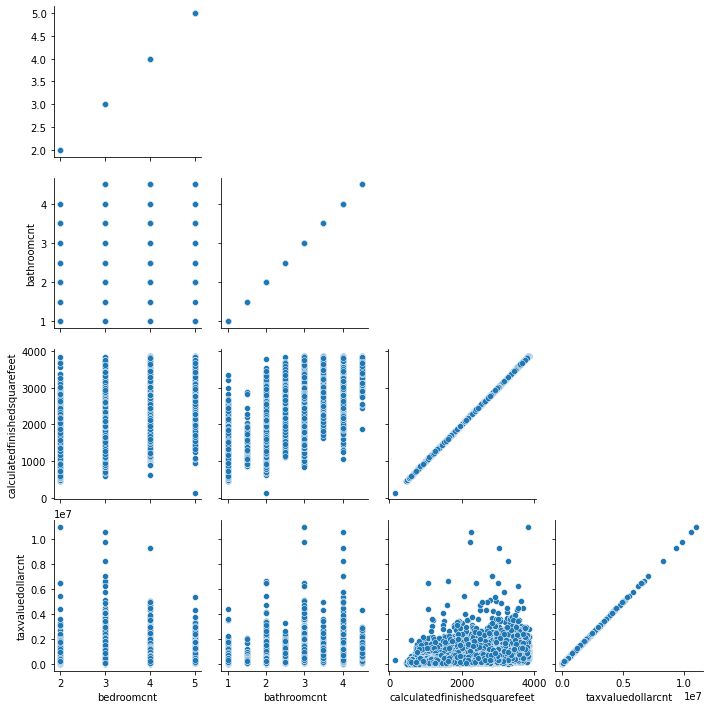

In [23]:
sns.pairplot(data=train, diag_kind=None, corner=True)
plt.show()

#### There appears to potentially be a relationship between sqft and tax value

In [24]:
# split train into X (dataframe, drop target) & y (series, keep target only)
X_train = train.drop(columns=['taxvaluedollarcnt'])
y_train = train['taxvaluedollarcnt']

# split validate into X (dataframe, drop target) & y (series, keep target only)
X_validate = validate.drop(columns=['taxvaluedollarcnt'])
y_validate = validate['taxvaluedollarcnt']

# split test into X (dataframe, drop target) & y (series, keep target only)
X_test = test.drop(columns=['taxvaluedollarcnt'])
y_test = test['taxvaluedollarcnt']

In [25]:
X_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet
48878,4.0,4.0,3771.0
45628,2.0,2.0,1211.0
71773,3.0,3.0,2838.0
24151,3.0,2.0,1134.0
12257,2.0,2.0,1466.0


In [26]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [27]:
predictions

array([1077264.57892092,  396600.04177348,  837794.99108577, ...,
        308808.42018399,  316665.64061178,  829966.07989794])

In [28]:
train['yhat'] = predictions
train['baseline'] = train.taxvaluedollarcnt.mean()

In [29]:
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yhat,baseline
48878,4.0,4.0,3771.0,661694.0,1.077265e+06,445041.790958
45628,2.0,2.0,1211.0,1588866.0,3.966000e+05,445041.790958
71773,3.0,3.0,2838.0,534623.0,8.377950e+05,445041.790958


In [30]:
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual_sq'] = train.baseline_residual**2
train['residual_sq'] = train.residual**2

In [31]:
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yhat,baseline,baseline_residual,residual,baseline_residual_sq,residual_sq
48878,4.0,4.0,3771.0,661694.0,1.077265e+06,445041.790958,2.166522e+05,-4.155706e+05,4.693818e+10,1.726989e+11
45628,2.0,2.0,1211.0,1588866.0,3.966000e+05,445041.790958,1.143824e+06,1.192266e+06,1.308334e+12,1.421498e+12
71773,3.0,3.0,2838.0,534623.0,8.377950e+05,445041.790958,8.958121e+04,-3.031720e+05,8.024793e+09,9.191326e+10


In [32]:
y_train

48878     661694.0
45628    1588866.0
71773     534623.0
24151      53568.0
12257     369416.0
           ...    
52190     483002.0
21680      59113.0
14238     259109.0
56111     199366.0
63558     851000.0
Name: taxvaluedollarcnt, Length: 28999, dtype: float64

In [33]:
y_train.max()

11000000.0

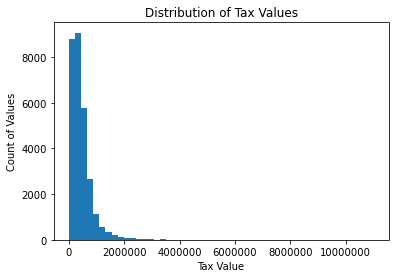

In [34]:
fig, ax = plt.subplots()
plt.hist(y_train, bins=50)
plt.title('Distribution of Tax Values')
ax.ticklabel_format(style='plain')
plt.xlabel('Tax Value')
plt.ylabel('Count of Values')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


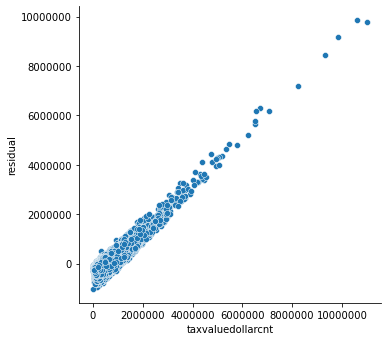

In [35]:
# 
sns.relplot(train.taxvaluedollarcnt, train.residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


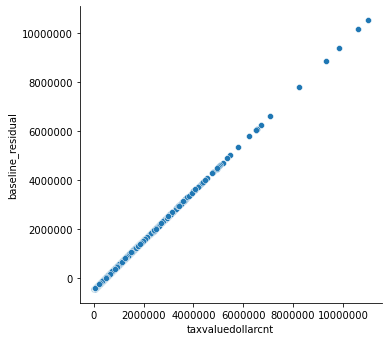

In [36]:
# 
sns.relplot(train.taxvaluedollarcnt, train.baseline_residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [37]:
SSE = train.residual_sq.sum()
MSE = SSE/len(train)
RMSE = MSE**0.5
MSE2 = mean_squared_error(train.taxvaluedollarcnt, train.yhat)
SSE2 = MSE2 * len(train)
RMSE2 = MSE2**0.5
print(f'SSE: {SSE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MSE2: {MSE2}')
print(f'SSE2: {SSE2}')
print(f'RMSE2: {RMSE2}')

ESS = sum((train.yhat - train.taxvaluedollarcnt.mean())**2)
TSS = ESS + SSE
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')

SSE: 4157778306525598.5
MSE: 143376609763.28833
RMSE: 378651.0395645156
MSE2: 143376609763.28833
SSE2: 4157778306525598.5
RMSE2: 378651.0395645156
ESS: 1195924314583104.5
TSS: 5353702621108703.0


In [38]:
SSE_baseline = train.baseline_residual_sq.sum()
MSE_baseline = SSE_baseline/len(train)
RMSE_baseline = MSE_baseline**0.5
MSE2_baseline = mean_squared_error(train.taxvaluedollarcnt, train.baseline)
SSE2_baseline = MSE2_baseline * len(train)
RMSE2_baseline = MSE2_baseline**0.5
print(f'Baseline SSE: {SSE_baseline}')
print(f'Baseline MSE: {MSE_baseline}')
print(f'Baseline RMSE: {RMSE_baseline}')
print(f'Baseline MSE2: {MSE2_baseline}')
print(f'Baseline SSE2: {SSE2_baseline}')
print(f'Baseline RMSE2: {RMSE2_baseline}')

ESS_baseline = sum((train.baseline - train.taxvaluedollarcnt.mean())**2)
TSS_baseline = ESS_baseline + SSE_baseline
print(f'Baseline ESS: {ESS_baseline}')
print(f'Baseline TSS: {TSS_baseline}')

Baseline SSE: 5353702621108032.0
Baseline MSE: 184616801307.2186
Baseline RMSE: 429670.5730059002
Baseline MSE2: 184616801307.2186
Baseline SSE2: 5353702621108032.0
Baseline RMSE2: 429670.5730059002
Baseline ESS: 0.0
Baseline TSS: 5353702621108032.0


In [39]:
r2_score(train.taxvaluedollarcnt, train.yhat)

0.223382656680867

In [40]:
r2_score(train.taxvaluedollarcnt, train.baseline)

0.0

In [41]:
wrangle.select_kbest(X_train, y_train, 2)

(['bathroomcnt', 'calculatedfinishedsquarefeet'],
        bathroomcnt  calculatedfinishedsquarefeet
 48878          4.0                        3771.0
 45628          2.0                        1211.0
 71773          3.0                        2838.0)

In [42]:
wrangle.rfe(X_train, y_train, 2)

(Index(['bedroomcnt', 'bathroomcnt'], dtype='object'),
        bedroomcnt  bathroomcnt
 48878         4.0          4.0
 45628         2.0          2.0
 71773         3.0          3.0)

In [43]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,taxvaluedollarcnt
48878,661694.0
45628,1588866.0
71773,534623.0
24151,53568.0
12257,369416.0


In [44]:
# 1. Predict tip_pred_mean
value_pred_mean = y_train.taxvaluedollarcnt.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

# 2. compute tip_pred_median
value_pred_median = y_train.taxvaluedollarcnt.median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

# 3. RMSE of tip_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_mean)**0.5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_mean)**0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tip_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_median)**0.5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_median)**0.5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  429670.57 
Validate/Out-of-Sample:  411957.62
RMSE using Median
Train/In-Sample:  438857.29 
Validate/Out-of-Sample:  421919.75


In [45]:
y_train.head()

,taxvaluedollarcnt,value_pred_mean,value_pred_median
48878,661694.0,445041.790958,355717.0
45628,1588866.0,445041.790958,355717.0
71773,534623.0,445041.790958,355717.0
24151,53568.0,445041.790958,355717.0
12257,369416.0,445041.790958,355717.0


In [46]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.value_pred_mean)}])

In [47]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,421919.753211,0.0


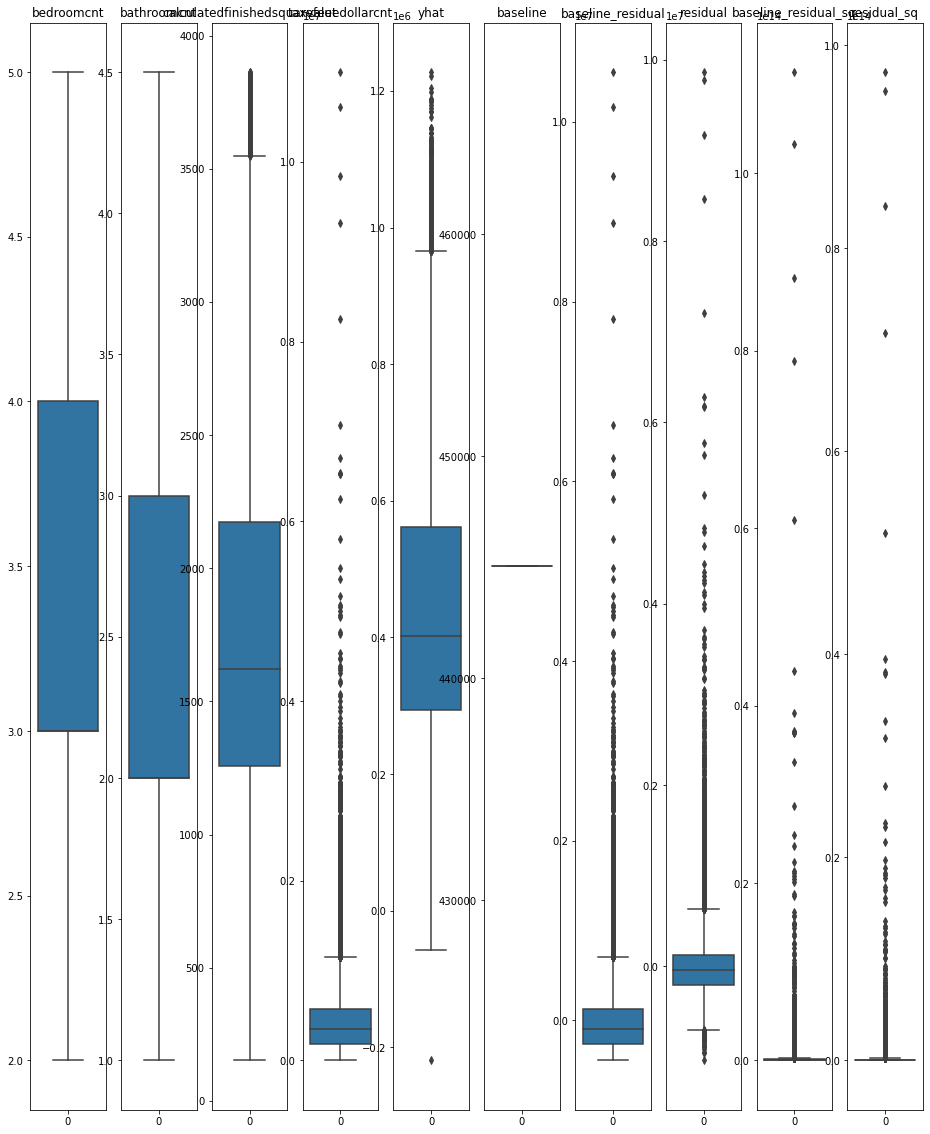

In [48]:
cols = [col for col in train.columns]
plt.figure(figsize=(16, 20))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=train[col])

    # Hide gridlines.
    plt.grid(False)

plt.show()

In [49]:
y_train.value_pred_median.max()

355717.0

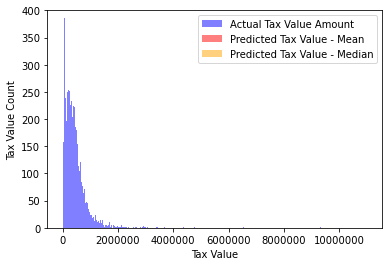

In [50]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value Amount", bins=2000)
plt.hist(y_train.value_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tax Value - Mean")
plt.hist(y_train.value_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tax Value - Median")
plt.xlabel("Tax Value")
plt.ylabel("Tax Value Count")
plt.ylim(top=400)
plt.legend()
plt.show()

In [51]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
# use
y_train['value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_lm) ** (1/2)
# predict validate
y_validate['value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  378651.0395645156 
Validation/Out-of-Sample:  360870.45018857194


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [52]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm)}, ignore_index=True)

/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/1148061546.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


In [53]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,421919.753211,0.000000
1,OLS lm 1,360870.450189,0.232773


In [54]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_lars) ** 0.5

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  378651.25524743827 
Validation/Out-of-Sample:  360861.232379637


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [55]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.value_pred_lars)}, ignore_index=True)
metric_df

/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/3567900795.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


,model,rmse_validate,r^2_validate
0,mean_baseline,421919.753211,0.000000
1,OLS lm 1,360870.450189,0.232773
2,LassoLars alpha 1,360861.232380,0.232812


In [56]:
 # create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_glm) ** 0.5


# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  429670.57300590014 
Validation/Out-of-Sample:  411957.6234219415


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

In [57]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.value_pred_glm)}, ignore_index=True)
metric_df

/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/1382340305.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


,model,rmse_validate,r^2_validate
0,mean_baseline,421919.753211,0.000000e+00
1,OLS lm 1,360870.450189,2.327729e-01
2,LassoLars alpha 1,360861.232380,2.328118e-01
3,GLM Model power 1,411957.623422,3.330669e-16


In [58]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

## **LinearRegression**

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
# 
# use the thing!
y_train['value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.value_pred_lm2) ** (1/2)
# predict validate
y_validate['value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm2) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for OLS using LinearRegression
Training/In-Sample:  374776.63955107867 
Validation/Out-of-Sample:  358994.3275324603


In [59]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm2)}, ignore_index=True)

/var/folders/t2/c4rfp_5j33nfsbfkcj7scwjh0000gn/T/ipykernel_8663/3724148272.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


In [60]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,421919.753211,0.000000e+00
1,OLS lm 1,360870.450189,2.327729e-01
2,LassoLars alpha 1,360861.232380,2.328118e-01
3,GLM Model power 1,411957.623422,3.330669e-16
4,Quadratic Model,358994.327532,2.407852e-01


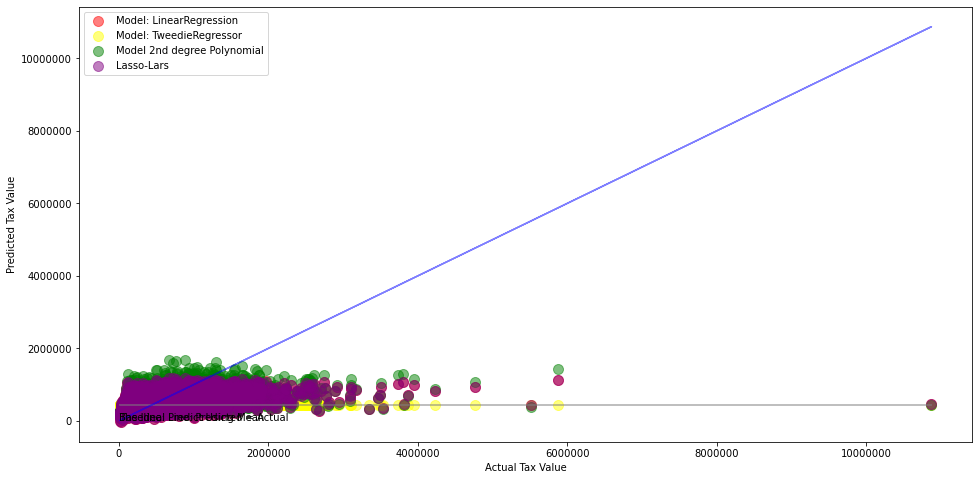

In [61]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5))#, rotation=15.5

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_glm, 
             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lars, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")
plt.ticklabel_format(style='plain')#
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.show()

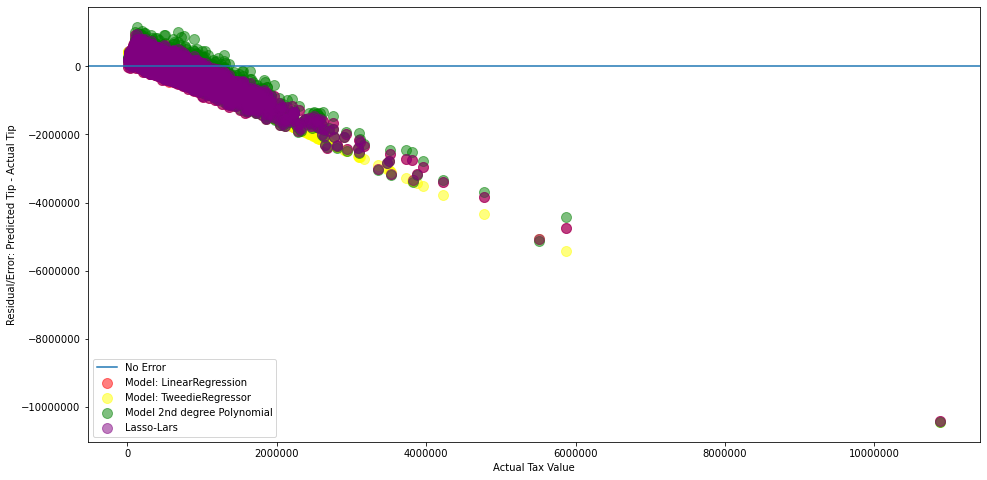

In [62]:
#y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm - y_validate.taxvaluedollarcnt, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_glm - y_validate.taxvaluedollarcnt, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lm2 - y_validate.taxvaluedollarcnt, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.value_pred_lars - y_validate.taxvaluedollarcnt, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tip - Actual Tip")
plt.show()

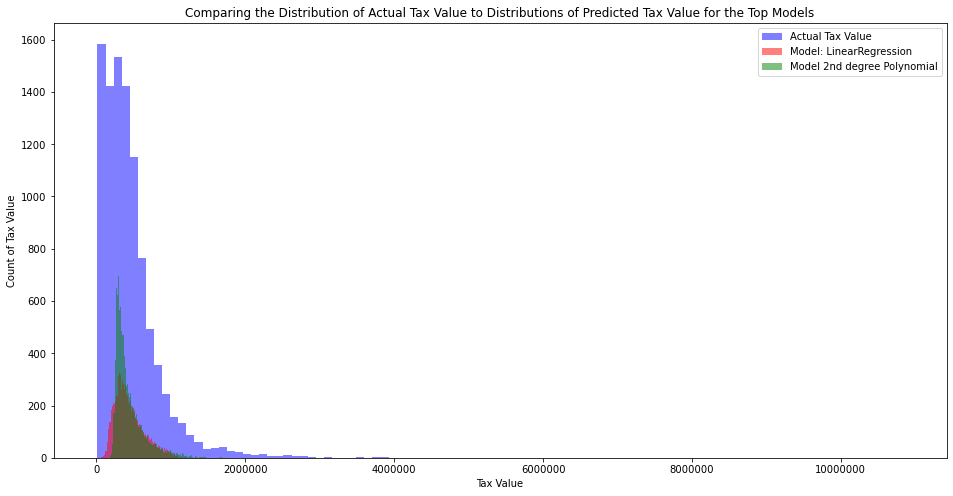

In [63]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value", bins=100)
plt.hist(y_validate.value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression", bins=100)
#plt.hist(y_validate.value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor", bins=100)
plt.hist(y_validate.value_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial", bins=100)
plt.xlabel("Tax Value")
plt.ylabel("Count of Tax Value")
plt.title("Comparing the Distribution of Actual Tax Value to Distributions of Predicted Tax Value for the Top Models")
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

---

# More features

In [64]:
zillow = pd.read_csv('zillow_2017_w_transactiondate.csv')
zillow.head()

,Unnamed: 0,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc
0,0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,...,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential
1,1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,...,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential
2,2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,...,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential
3,3,261.0,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,...,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential
4,4,266.0,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,...,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,4,0.006940,2017-01-01,Condominium


In [65]:
zillow = wrangle.wrangle_zillow(zillow)
zillow.head()

Number of observations removed: 3089


/Users/everettclark/Desktop/codeup-data-science/zillow_project/wrangle.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['transactiondate'].str[5:7]
/Users/everettclark/Desktop/codeup-data-science/zillow_project/wrangle.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactiondate'] = df['transactiondate'].str[:4]
/Users/everettclark/Desktop/codeup-data-science/zillow_project/wrangle.py:500: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,bathrooms,bedrooms,bldg_quality,f_sqft,fips,systemtype,latitude,longitude,lot_size,zip,built,tax_value,month
0,3.5,4.0,8.0,3100.0,6059.0,2.0,33634931.0,-117869207.0,4506.0,96978.0,1998.0,1023282.0,01
1,1.0,2.0,8.0,1465.0,6111.0,2.0,34449266.0,-119281531.0,12647.0,97099.0,1967.0,464000.0,01
2,2.0,3.0,8.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,97078.0,1962.0,564778.0,01
3,3.0,4.0,8.0,2376.0,6037.0,2.0,34245180.0,-118240722.0,13038.0,96330.0,1970.0,145143.0,01
6,3.0,4.0,9.0,2962.0,6037.0,2.0,34145202.0,-118179824.0,63000.0,96293.0,1950.0,773303.0,01


In [66]:
zillow

,bathrooms,bedrooms,bldg_quality,f_sqft,fips,systemtype,latitude,longitude,lot_size,zip,built,tax_value,month
0,3.5,4.0,8.0,3100.0,6059.0,2.0,33634931.0,-117869207.0,4506.0,96978.0,1998.0,1023282.0,01
1,1.0,2.0,8.0,1465.0,6111.0,2.0,34449266.0,-119281531.0,12647.0,97099.0,1967.0,464000.0,01
2,2.0,3.0,8.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,97078.0,1962.0,564778.0,01
3,3.0,4.0,8.0,2376.0,6037.0,2.0,34245180.0,-118240722.0,13038.0,96330.0,1970.0,145143.0,01
6,3.0,4.0,9.0,2962.0,6037.0,2.0,34145202.0,-118179824.0,63000.0,96293.0,1950.0,773303.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77573,2.0,4.0,6.0,1633.0,6037.0,2.0,33870815.0,-118070858.0,4630.0,96204.0,1962.0,346534.0,09
77575,2.0,2.0,6.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,96284.0,1940.0,354621.0,09
77576,2.0,4.0,8.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,97116.0,1964.0,67205.0,09
77577,1.0,3.0,4.0,1032.0,6037.0,2.0,34040895.0,-118038169.0,5074.0,96480.0,1954.0,49546.0,09


In [67]:
train, validate, test = wrangle.split(zillow)

       bathrooms  bedrooms  bldg_quality  f_sqft    fips  systemtype  \
0            3.5       4.0           8.0  3100.0  6059.0         2.0   
1            1.0       2.0           8.0  1465.0  6111.0         2.0   
2            2.0       3.0           8.0  1243.0  6059.0         2.0   
3            3.0       4.0           8.0  2376.0  6037.0         2.0   
6            3.0       4.0           9.0  2962.0  6037.0         2.0   
...          ...       ...           ...     ...     ...         ...   
77573        2.0       4.0           6.0  1633.0  6037.0         2.0   
77575        2.0       2.0           6.0  1286.0  6037.0         2.0   
77576        2.0       4.0           8.0  1612.0  6111.0         2.0   
77577        1.0       3.0           4.0  1032.0  6037.0         2.0   
77578        2.0       3.0           6.0  1762.0  6037.0         2.0   

         latitude    longitude  lot_size      zip   built  tax_value month  
0      33634931.0 -117869207.0    4506.0  96978.0  1998.0 

In [68]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(zillow, 'tax_value')

In [69]:
X_train

,bathrooms,bedrooms,bldg_quality,f_sqft,fips,systemtype,latitude,longitude,lot_size,zip,built,month
51874,2.0,4.0,8.0,1952.0,6037.0,2.0,34661379.0,-118158961.0,11727.0,97317.0,1970.0,06
3539,3.5,5.0,8.0,4001.0,6059.0,2.0,33693399.0,-118008038.0,9750.0,96966.0,1987.0,01
50669,2.5,2.0,8.0,1402.0,6059.0,2.0,33759065.0,-117976443.0,2400.0,96990.0,1982.0,06
48716,2.0,3.0,6.0,1245.0,6037.0,2.0,34710114.0,-118153830.0,5993.0,97317.0,1957.0,06
27370,3.0,4.0,8.0,2352.0,6037.0,2.0,33763862.0,-118141429.0,6350.0,96237.0,1931.0,04
...,...,...,...,...,...,...,...,...,...,...,...,...
34392,3.0,3.0,7.0,2080.0,6037.0,2.0,34032743.0,-118506877.0,8239.0,96149.0,1951.0,05
18029,1.0,1.0,8.0,600.0,6059.0,2.0,33674146.0,-117954589.0,800.0,96964.0,1963.0,03
29121,4.0,4.0,6.0,3928.0,6037.0,2.0,34229137.0,-118524401.0,32157.0,96355.0,1942.0,04
26276,3.0,3.0,10.0,2830.0,6037.0,2.0,33972842.0,-118457021.0,2822.0,96128.0,1984.0,04


In [70]:
wrangle.select_kbest(X_train, y_train, 5)

(['bathrooms', 'bedrooms', 'bldg_quality', 'f_sqft', 'built'],
       bathrooms bedrooms bldg_quality  f_sqft   built
 51874       2.0      4.0          8.0  1952.0  1970.0
 3539        3.5      5.0          8.0  4001.0  1987.0
 50669       2.5      2.0          8.0  1402.0  1982.0)

In [71]:
wrangle.rfe(X_train, y_train, 5)

(Index(['bathrooms', 'bedrooms', 'bldg_quality', 'systemtype', 'built'], dtype='object'),
       bathrooms bedrooms bldg_quality systemtype   built
 51874       2.0      4.0          8.0        2.0  1970.0
 3539        3.5      5.0          8.0        2.0  1987.0
 50669       2.5      2.0          8.0        2.0  1982.0)

In [72]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
51874,269000.0
3539,819561.0
50669,194597.0
48716,134807.0
27370,1191735.0


In [73]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [74]:
y_train['yhat'] = predictions
y_train['baseline'] = y_train.tax_value.mean()

In [75]:
X_train

,bathrooms,bedrooms,bldg_quality,f_sqft,fips,systemtype,latitude,longitude,lot_size,zip,built,month
51874,2.0,4.0,8.0,1952.0,6037.0,2.0,34661379.0,-118158961.0,11727.0,97317.0,1970.0,06
3539,3.5,5.0,8.0,4001.0,6059.0,2.0,33693399.0,-118008038.0,9750.0,96966.0,1987.0,01
50669,2.5,2.0,8.0,1402.0,6059.0,2.0,33759065.0,-117976443.0,2400.0,96990.0,1982.0,06
48716,2.0,3.0,6.0,1245.0,6037.0,2.0,34710114.0,-118153830.0,5993.0,97317.0,1957.0,06
27370,3.0,4.0,8.0,2352.0,6037.0,2.0,33763862.0,-118141429.0,6350.0,96237.0,1931.0,04
...,...,...,...,...,...,...,...,...,...,...,...,...
34392,3.0,3.0,7.0,2080.0,6037.0,2.0,34032743.0,-118506877.0,8239.0,96149.0,1951.0,05
18029,1.0,1.0,8.0,600.0,6059.0,2.0,33674146.0,-117954589.0,800.0,96964.0,1963.0,03
29121,4.0,4.0,6.0,3928.0,6037.0,2.0,34229137.0,-118524401.0,32157.0,96355.0,1942.0,04
26276,3.0,3.0,10.0,2830.0,6037.0,2.0,33972842.0,-118457021.0,2822.0,96128.0,1984.0,04


In [77]:
y_train['baseline_residual'] = y_train.tax_value - y_train.baseline
y_train['residual'] = y_train.tax_value - y_train.yhat
y_train['baseline_residual_sq'] = y_train.baseline_residual**2
y_train['residual_sq'] = y_train.residual**2

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


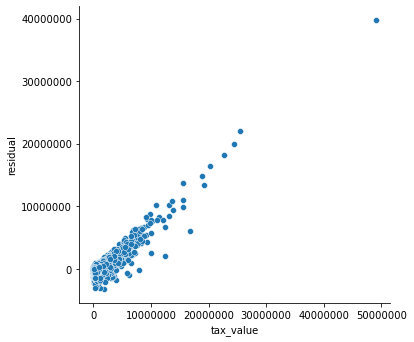

In [78]:
sns.relplot(y_train.tax_value, y_train.residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


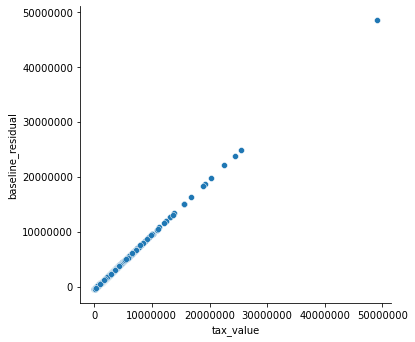

In [79]:
# 
sns.relplot(y_train.tax_value, y_train.baseline_residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [80]:
print(r2_score(y_train.tax_value, y_train.yhat))
print(r2_score(y_train.tax_value, y_train.baseline))

0.4092879633233696
0.0


In [81]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit
lm.fit(X_train, y_train.tax_value)

# predict train
# use
y_train['value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm) ** (1/2)
# predict validate
y_validate['value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  619365.9475564549 
Validation/Out-of-Sample:  517995.3779430237


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [83]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) ** 0.5

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  619366.5010885169 
Validation/Out-of-Sample:  517945.34316105995


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [84]:
 # create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

glm.fit(X_train, y_train.tax_value)

# predict train
y_train['value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) ** 0.5


# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  805859.6561658758 
Validation/Out-of-Sample:  676676.2919489072


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

In [85]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

## **LinearRegression**

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
# 
# use the thing!
y_train['value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm2) ** (1/2)
# predict validate
y_validate['value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm2) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  530593.9250702166 
Validation/Out-of-Sample:  558725.8616902106


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [87]:
# 1. Predict value_pred_mean
value_pred_mean = y_train.tax_value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

# 2. compute value_pred_median
value_pred_median = y_train.tax_value.median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

# 3. RMSE of value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_mean)**0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean)**0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_median)**0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_median)**0.5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  805859.66 
Validate/Out-of-Sample:  676676.29
RMSE using Median
Train/In-Sample:  821504.29 
Validate/Out-of-Sample:  693916.63


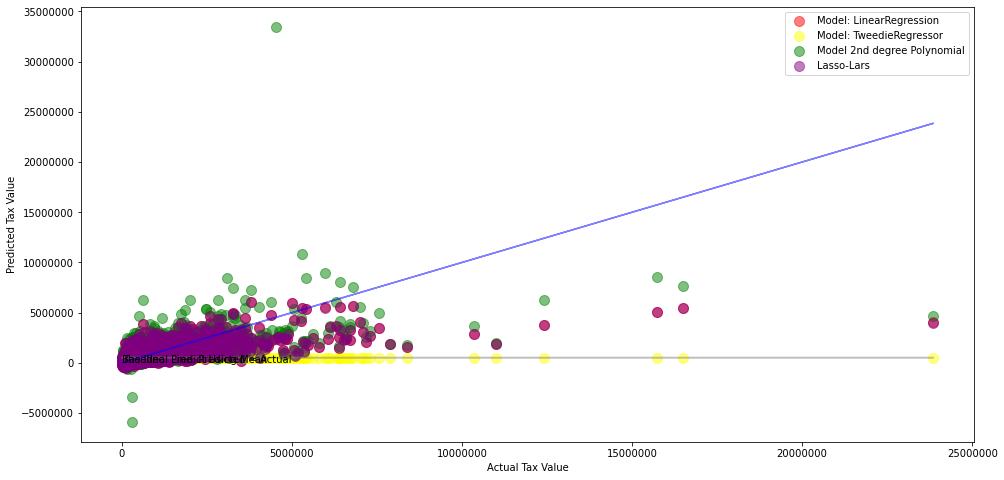

In [88]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5))#, rotation=15.5

plt.scatter(y_validate.tax_value, y_validate.value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.value_pred_glm, 
             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.tax_value, y_validate.value_pred_lars, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")
plt.ticklabel_format(style='plain')#
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


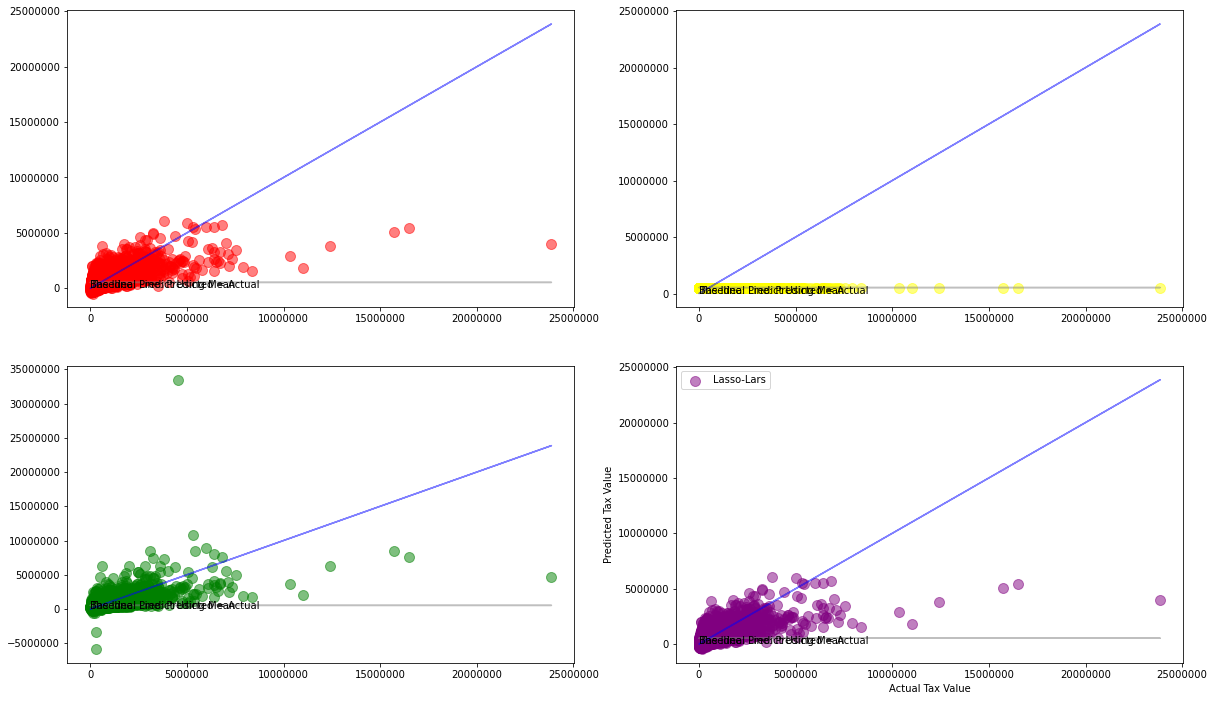

In [127]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1
axs[0, 0].scatter(y_validate.tax_value, y_validate.value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
axs[0, 0].plot(y_validate.tax_value, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
axs[0, 0].annotate("Baseline: Predict Using Mean", (16, 9.5))
axs[0, 0].plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
axs[0, 0].annotate("The Ideal Line: Predicted = Actual", (.5, 3.5))#, rotation=15.5
axs[0, 0].ticklabel_format(style='plain')
ax.set_title('Normal Title', fontstyle='italic')

# Plot 2
axs[0, 1].scatter(y_validate.tax_value, y_validate.value_pred_glm, 
             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
axs[0, 1].plot(y_validate.tax_value, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
axs[0, 1].annotate("Baseline: Predict Using Mean", (16, 9.5))
axs[0, 1].plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
axs[0, 1].annotate("The Ideal Line: Predicted = Actual", (.5, 3.5))
axs[0, 1].ticklabel_format(style='plain')
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")

# Plot 3
axs[1, 0].scatter(y_validate.tax_value, y_validate.value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
axs[1, 0].plot(y_validate.tax_value, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
axs[1, 0].annotate("Baseline: Predict Using Mean", (16, 9.5))
axs[1, 0].plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
axs[1, 0].annotate("The Ideal Line: Predicted = Actual", (.5, 3.5))
axs[1, 0].ticklabel_format(style='plain')
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")

# Plot 4
axs[1, 1].scatter(y_validate.tax_value, y_validate.value_pred_lars, 
            alpha=.5, color="purple", s=100, label="Lasso-Lars")
axs[1, 1].plot(y_validate.tax_value, y_validate.value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
axs[1, 1].annotate("Baseline: Predict Using Mean", (16, 9.5))
axs[1, 1].plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
axs[1, 1].annotate("The Ideal Line: Predicted = Actual", (30, 30))
axs[1, 1].ticklabel_format(style='plain')

plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.show()

In [ ]:
break

---

# Questions:
### 1. What are the most important features that determine a home's value?
### 2. 
### 3. 
### 4. 

---

# Acquisition:

## First acquire the data from my .csv file

zillow = acquire.get_zillow_2017()
zillow.head()

In [ ]:
zillow[zillow.propertylandusedesc == 'Single Family Residential']

# Preparation

## Analysis will be focused on Single Family Homes
    - Within the wrangle file, I will be using a function that only includes SFH and 6 features
    - That same function imputes either the median or the mode of columns values for any nulls

In [ ]:
zillow = wrangle.wrangle_zillow(zillow)

In [ ]:
zillow.head(2)

### Lastly, the data will be separated in to Train, Validate, and Test

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(zillow, 'tax_value')

In [ ]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.scale_data(X_train, X_validate, X_test)

In [ ]:
# Checking the split
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

In [ ]:
X_train.head(3)

In [ ]:
y_train.head(3)

---

# Exploration and Pre-Processing

---

# Modeling

---

# Findings

In [11]:
zillow

,Unnamed: 0,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,month
0,0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,...,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,2017,Single Family Residential,01
1,1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,...,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,2017,Single Family Residential,01
2,2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,...,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,2017,Single Family Residential,01
3,3,261.0,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,...,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,2017,Single Family Residential,01
6,6,261.0,12095076,781532,1.0,NaN,NaN,3.0,4.0,NaN,...,496619.0,9516.26,NaN,NaN,6.037461e+13,6,-0.001011,2017,Single Family Residential,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77573,77573,261.0,12412492,2274245,NaN,NaN,NaN,2.0,4.0,NaN,...,221068.0,4175.08,NaN,NaN,6.037555e+13,77607,0.001082,2017,Single Family Residential,09
77575,77575,261.0,11000655,673515,NaN,NaN,NaN,2.0,2.0,NaN,...,283704.0,4478.43,NaN,NaN,6.037101e+13,77609,0.020615,2017,Single Family Residential,09
77576,77576,261.0,17239384,2968375,NaN,NaN,NaN,2.0,4.0,NaN,...,16522.0,1107.48,NaN,NaN,6.111008e+13,77610,0.013209,2017,Single Family Residential,09
77577,77577,261.0,12773139,1843709,1.0,NaN,NaN,1.0,3.0,NaN,...,16749.0,876.43,NaN,NaN,6.037434e+13,77611,0.037129,2017,Single Family Residential,09


In [ ]:
def vis(df, col, col2):
    plt.title(f'Relationship of {col2} and {col}')
    sns.barplot(x=col, y=col2, data=df)
    sns.barplot(x=col, y=col2, data=df).axhline(df.tax_value.mean())
    
    plt.show()
    
    plt.hist(df.tax_value[df.fips == 6037.0], color='blue', alpha=.3, label="Los Angeles", bins=150)
    plt.hist(df.tax_value[df.fips == 6059.0], color='black', alpha=.3, label="Orange", bins=150)

    plt.axvline(x=df.tax_value[df.fips == 6037.0].mean(), color='blue', label='LA County Mean Value: 356k')
    plt.axvline(x=df.tax_value[df.fips == 6059.0].mean(), color='black', label='Orange County Mean Value: 447k')
    plt.axvline(x=df.tax_value[df.fips == 6111.0].mean(), color='purple', label='Ventura County Mean Value: 408k')


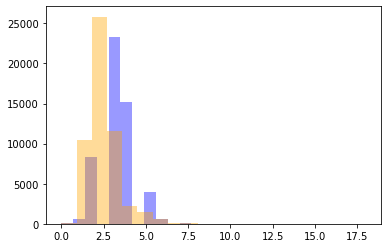

In [23]:
def graph(df, col1, col2)
    plt.hist(zillow.bedroomcnt, color='blue', alpha=0.4, bins=20)
    plt.hist(zillow.bathroomcnt, color='orange', alpha=0.4, bins = 20)

    plt.show()

In [ ]:
def graph(df, col1, col2)
    plt.hist(df.bedrooms, color='blue', alpha=0.4, bins=20)
    plt.hist(df.bathrooms, color='orange', alpha=0.4, bins = 20)

    plt.show()

In [25]:
bedrooms = zillow[['bedroomcnt']]
bedrooms

,bedroomcnt
0,4.0
1,2.0
2,3.0
3,4.0
6,4.0
...,...
77573,4.0
77575,2.0
77576,4.0
77577,3.0


In [ ]:
.fit(bedrooms)